In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importacion del dataset soccer
dataframe = pd.read_csv('cryotherapy.csv')
dataframe.head()

,sex,age,time,number_of_warts,type,area,result_of_treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [3]:
# mostramos la ultima columna
dataframe['result_of_treatment']

0     0
1     1
2     0
3     0
4     0
     ..
85    0
86    1
87    0
88    1
89    1
Name: result_of_treatment, Length: 90, dtype: int64

In [4]:
# Sin repitencia
# Es equivalente a distinct (oracle)
dataframe['result_of_treatment'].unique()

array([0, 1], dtype=int64)

In [6]:
# Separamos el dataframe en x y
y = dataframe['result_of_treatment']
x = dataframe.drop('result_of_treatment', axis=1)

In [7]:
x


,sex,age,time,number_of_warts,type,area
0,1,35,12.00,5,1,100
1,1,29,7.00,5,1,96
2,1,50,8.00,1,3,132
3,1,32,11.75,7,3,750
4,1,67,9.25,1,1,42
...,...,...,...,...,...,...
85,2,34,12.00,3,3,95
86,2,20,3.50,6,1,75
87,2,35,8.25,8,3,100
88,1,24,10.75,10,1,20


In [8]:
y

0     0
1     1
2     0
3     0
4     0
     ..
85    0
86    1
87    0
88    1
89    1
Name: result_of_treatment, Length: 90, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [11]:
x_train

,sex,age,time,number_of_warts,type,area
74,1,17,9.25,12,1,10
5,1,41,8.00,2,2,20
76,1,23,10.25,7,3,72
23,2,40,9.75,1,2,80
66,2,36,10.50,4,1,8
...,...,...,...,...,...,...
61,1,29,11.75,5,1,96
32,1,50,8.75,11,3,132
3,1,32,11.75,7,3,750
30,1,35,9.25,9,1,100


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
#Entrenar el algoritmo
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
predicciones = knn.predict(x_test)

In [19]:
predicciones = knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicciones))
print(classification_report(y_test,predicciones))

[[10  2]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      1.00      0.94        15

    accuracy                           0.93        27
   macro avg       0.94      0.92      0.92        27
weighted avg       0.93      0.93      0.92        27



In [21]:
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediccion_i = knn.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [22]:
tasa_error

[0.07407407407407407,
 0.25925925925925924,
 0.25925925925925924,
 0.3333333333333333,
 0.37037037037037035,
 0.25925925925925924,
 0.25925925925925924,
 0.2222222222222222,
 0.1111111111111111,
 0.2222222222222222,
 0.2222222222222222,
 0.2962962962962963,
 0.2222222222222222,
 0.2222222222222222,
 0.14814814814814814,
 0.3333333333333333,
 0.4074074074074074,
 0.37037037037037035,
 0.2962962962962963,
 0.3333333333333333,
 0.2962962962962963,
 0.2962962962962963,
 0.2962962962962963,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.4074074074074074,
 0.4074074074074074,
 0.4074074074074074]

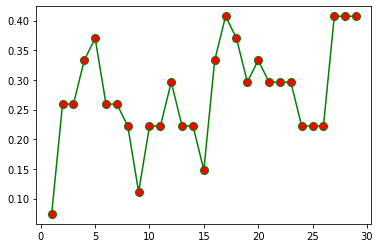

In [23]:
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o',markerfacecolor = 'red', markersize='8')

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predicciones = knn.predict(x_test)
print(confusion_matrix(y_test, predicciones))

[[ 8  4]
 [ 3 12]]


In [25]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.75      0.80      0.77        15

    accuracy                           0.74        27
   macro avg       0.74      0.73      0.73        27
weighted avg       0.74      0.74      0.74        27

